# RentSafeTO: Predicting Building Evaluation with Machine Learning
<br>
<div style="text-align: right"> 
Author: Hyunjung Kim<br>
Date: August 4, 2023
</div>

**Introduction:**

Welcome to our RentSafeTO project! In this capstone, we aim to predict the safety assessment of apartment buildings in Toronto using machine learning. Our goal is to provide valuable insights to both tenants and prospective property owners, empowering them to make informed decisions about housing safety.

**The Big Idea:**

RentSafeTO revolves around analyzing factors that influence building safety. By considering variables such as building height, construction year, population density, laundry facilities, and waste disposal, our predictive model aims to forecast the safety evaluation outcomes.

**The Impact:**

The impact of RentSafeTO extends to multiple stakeholders. Prospective property buyers can benefit from a risk assessment before purchasing an apartment building. Tenants planning to move can access safety information to choose safer living environments. Landlords can proactively address safety concerns, leading to a more secure rental market.

**The Data:**

Our project utilizes data from the Toronto open data site, encompassing various apartment building evaluations. By analyzing this dataset, we aim to uncover patterns and correlations, enabling our predictive model to make accurate safety assessments.


**Columns**

1. Building Information:
   - _id: Unique row identifier for Open Data database
   - RSN: Building Identifier
   - YEAR REGISTERED: Year of Registration in RentSafeTO
   - YEAR BUILT: Year the Building was Constructed
   - YEAR EVALUATED: Year of Building Evaluation
   - PROPERTY TYPE: Type of Building Ownership (Private, Toronto Community Housing Corporation, Other Assisted or Social Housing Providers)
   - NUMBERING OF PROPERTY: Appropriate size and visibility of property numbering
   
2. Location Information:
   - WARD: Ward where the Building is Located
   - WARDNAME: Name of the Ward
   - SITE ADDRESS: Building Address
   - GRID: Administrative Area the Building Belongs to
   - LATITUDE
   - LONGITUDE
   - X
   - Y

3. Building Details:
   - CONFIRMED STOREYS: Number of Storeys in the Building
   - CONFIRMED UNITS: Number of Units (Dwellings) in the Building
   - EVALUATION COMPLETED ON: Date of Building Evaluation
   - NO OF AREAS EVALUATED: Number of items evaluated during a single evaluation
   - SCORE: Weighted Average Score of the Building

4. Exterior Maintenance:
   - EXTERIOR GROUNDS: Maintenance, cleanliness, landscaping, drainage, and lighting of exterior grounds
   - FENCING: Maintenance and materials of all fencing within the property
   - RETAINING WALLS: Maintenance and safety of all retaining walls
   - CATCH BASINS / STORM DRAINAGE: Maintenance and condition of catch basins and storm drainage systems
   - BUILDING EXTERIOR: Maintenance and safety of exterior walls, flashing, pipes, attachments, and balcony slabs
   - BALCONY GUARDS: Maintenance and safety of balcony guards
   - WINDOWS: Maintenance of all windows, safety devices, and window screens
   - EXT. RECEPTACLE STORAGE AREA: Maintenance and cleanliness of exterior waste storage areas
   - EXTERIOR WALKWAYS: Maintenance, cleanliness, drainage, and safety of exterior walkways
   - CLOTHING DROP BOXES: Maintenance and safety of clothing drop boxes
   - ACCESSORY BUILDINGS: Maintenance and safety of additional buildings or structures

5. Interior Maintenance:
   - INTERCOM: Maintenance and operability of intercoms
   - EMERGENCY CONTACT SIGN: Maintenance of emergency contact signs
   - LOBBY - WALLS AND CEILING: Maintenance and safety of lobby walls and ceilings
   - LOBBY FLOORS: Maintenance and safety of lobby floors
   - LAUNDRY ROOM: Maintenance, operability, and lighting of laundry rooms
   - INT. RECEPTACLE STORAGE AREA: Maintenance and cleanliness of interior waste storage areas
   - MAIL RECEPTACLES: Maintenance and safety of mailboxes
   - EXTERIOR DOORS: Maintenance and operability of exterior doors
   - STORAGE AREAS/LOCKERS MAINT.: Maintenance of storage areas/lockers
   - ELEVATOR MAINTENANCE: Maintenance of elevators to keep them in good repair
   - ELEVATOR COSMETICS: Maintenance and condition of elevator parts and attachments

6. Common Area Maintenance:
   - COMMON AREA VENTILATION: Maintenance of ventilation systems in common areas
   - ELECTRICAL SERVICES / OUTLETS: Maintenance of electrical fixtures, switches, receptacles, and connections
   - CHUTE ROOMS - MAINTENANCE: Maintenance and operability of chute rooms
   - STAIRWELL - WALLS AND CEILING: Maintenance and safety of stairwell walls and ceilings
   - STAIRWELL - LANDING AND STEPS: Maintenance and safety of stairwell landings and steps
   - STAIRWELL LIGHTING: Maintenance and safety of stairwell lighting
   - INT. HANDRAIL / GUARD - SAFETY: Safety of interior handrails and guards
   - INT. HANDRAIL / GUARD - MAINT.: Maintenance and cleanliness of interior handrails and guards

7. Building Hygiene:
   - BUILDING CLEANLINESS: Keeping common areas clean according to standards
   - COMMON AREA PESTS: Handling pests in common areas
   - GRAFFITI: Handling of graffiti in common areas or exterior grounds

8. Building Services:
   - TENANT NOTIFICATION BOARD: Displaying important notices for tenants
   - PEST CONTROL LOG: Keeping a log of pest inspections and treatments
   - MAINTENANCE LOG: Keeping a log of service and maintenance on various systems
   - CLEANING LOG: Keeping a log of scheduled or unscheduled cleaning activities
   - VITAL SERVICE PLAN: Maintaining a plan for essential services to tenants
   - ELECTRICAL SAFETY PLAN: Maintaining an electrical maintenance plan
   - STATE OF GOOD REPAIR PLAN: Maintaining a plan for repairs and improvements
   - TENANT SERVICE REQUEST LOG: Keeping a log of tenant service requests

9. Others:
   - PARKING AREAS: Maintenance and cleanliness of parking areas
   - POOLS: Maintenance and access to pools, if applicable
   - OTHER AMENITIES: Maintenance and access to community rooms, play areas, gyms, or tennis courts
   - ABANDONED EQUIP./DERELICT VEH.: Handling abandoned equipment and derelict vehicles


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read Data
df = pd.read_csv('../data/Apartment Building Evaluation.csv')

In [3]:
# Sanity Check
df.head()

,_id,RSN,YEAR_REGISTERED,YEAR_EVALUATED,YEAR_BUILT,PROPERTY_TYPE,WARD,WARDNAME,SITE_ADDRESS,CONFIRMED_STOREYS,...,EXTERIOR_WALKWAYS,BALCONY_GUARDS,WATER_PEN_EXT_BLDG_ELEMENTS,PARKING_AREA,OTHER_FACILITIES,GRID,LATITUDE,LONGITUDE,X,Y
0,4167486,4304347,NaN,NaN,1999.0,PRIVATE,2,Etobicoke Centre,** CREATED IN ERROR ** 399 THE WEST MALL,22,...,5.0,5.0,5.0,5.0,5.0,W0233,43.643781,-79.565456,299503.625,4833538.964
1,4167487,5157421,2023.0,NaN,1973.0,TCHC,17,Don Valley North,6 TREE SPARROWAY,4,...,3.0,5.0,4.0,3.0,4.0,N1721,43.791384,-79.369630,315272.148,4849932.515
2,4167488,5156814,2023.0,NaN,1973.0,TCHC,17,Don Valley North,13 FIELD SPARROWAY,4,...,4.0,5.0,4.0,3.0,4.0,N1721,43.790920,-79.368771,315334.815,4849906.373
3,4167489,5157387,2023.0,NaN,1973.0,TCHC,17,Don Valley North,4 TREE SPARROWAY,4,...,3.0,5.0,4.0,3.0,4.0,N1721,43.791448,-79.369332,315291.755,4849938.162
4,4167490,5156871,2023.0,NaN,1973.0,TCHC,17,Don Valley North,2 TREE SPARROWAY,4,...,5.0,5.0,4.0,3.0,4.0,N1721,43.791511,-79.369045,315330.308,4849947.465



**Data Cleaning (Summary):**

1. The dataset consists of 11,760 rows and 40 columns.
2. There are no duplicate rows, but some columns contain duplicated information.
3. Duplicate columns were removed during the data cleaning process.
4. Columns with a missing value of 50% or more were deleted.

In [4]:
df.shape

(11760, 40)

In this dataset, we have 11760 rows and 40 coulumns. 

In [5]:
for i in df.columns:
    print
    print(i)

_id
RSN
YEAR_REGISTERED
YEAR_EVALUATED
YEAR_BUILT
PROPERTY_TYPE
WARD
WARDNAME
SITE_ADDRESS
CONFIRMED_STOREYS
CONFIRMED_UNITS
EVALUATION_COMPLETED_ON
SCORE
RESULTS_OF_SCORE
NO_OF_AREAS_EVALUATED
ENTRANCE_LOBBY
ENTRANCE_DOORS_WINDOWS
SECURITY
STAIRWELLS
LAUNDRY_ROOMS
INTERNAL_GUARDS_HANDRAILS
GARBAGE_CHUTE_ROOMS
GARBAGE_BIN_STORAGE_AREA
ELEVATORS
STORAGE_AREAS_LOCKERS
INTERIOR_WALL_CEILING_FLOOR
INTERIOR_LIGHTING_LEVELS
GRAFFITI
EXTERIOR_CLADDING
EXTERIOR_GROUNDS
EXTERIOR_WALKWAYS
BALCONY_GUARDS
WATER_PEN_EXT_BLDG_ELEMENTS
PARKING_AREA
OTHER_FACILITIES
GRID
LATITUDE
LONGITUDE
X
Y


**And there is not duplicated row each one as unique.**

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   _id                          11760 non-null  int64  
 1   RSN                          11760 non-null  int64  
 2   YEAR_REGISTERED              11455 non-null  float64
 3   YEAR_EVALUATED               9751 non-null   float64
 4   YEAR_BUILT                   11714 non-null  float64
 5   PROPERTY_TYPE                11760 non-null  object 
 6   WARD                         11760 non-null  int64  
 7   WARDNAME                     11760 non-null  object 
 8   SITE_ADDRESS                 11760 non-null  object 
 9   CONFIRMED_STOREYS            11760 non-null  int64  
 10  CONFIRMED_UNITS              11760 non-null  int64  
 11  EVALUATION_COMPLETED_ON      11760 non-null  object 
 12  SCORE                        11760 non-null  int64  
 13  RESULTS_OF_SCORE

**Most of the columns are scored from 1 to 5. This means that the columns with scores are the main sources used for judgment.**

In [8]:
for i in df.columns:
    print('number of distinct in', i)
    print(':', df[i].nunique())
        

number of distinct in _id
: 11760
number of distinct in RSN
: 3513
number of distinct in YEAR_REGISTERED
: 7
number of distinct in YEAR_EVALUATED
: 5
number of distinct in YEAR_BUILT
: 130
number of distinct in PROPERTY_TYPE
: 3
number of distinct in WARD
: 25
number of distinct in WARDNAME
: 25
number of distinct in SITE_ADDRESS
: 3513
number of distinct in CONFIRMED_STOREYS
: 40
number of distinct in CONFIRMED_UNITS
: 383
number of distinct in EVALUATION_COMPLETED_ON
: 564
number of distinct in SCORE
: 66
number of distinct in RESULTS_OF_SCORE
: 4
number of distinct in NO_OF_AREAS_EVALUATED
: 11
number of distinct in ENTRANCE_LOBBY
: 5
number of distinct in ENTRANCE_DOORS_WINDOWS
: 5
number of distinct in SECURITY
: 5
number of distinct in STAIRWELLS
: 5
number of distinct in LAUNDRY_ROOMS
: 5
number of distinct in INTERNAL_GUARDS_HANDRAILS
: 5
number of distinct in GARBAGE_CHUTE_ROOMS
: 5
number of distinct in GARBAGE_BIN_STORAGE_AREA
: 5
number of distinct in ELEVATORS
: 5
number o

**As a target 'SCORE' shows the results in score, and 'RESULTS_OF_SCORE' tells the results of the revaluation period that it receives.**

In [9]:
# There are four following results as a result of the evaluation score.

df['RESULTS_OF_SCORE'].value_counts()

Evaluation needs to be conducted in 2 years    7396
Evaluation needs to be conducted in 1 year     2619
Evaluation needs to be conducted in 3 years    1628
Building Audit                                  117
Name: RESULTS_OF_SCORE, dtype: int64

**_id, RSN, LATITUDE, LATITUDE, X, and Y are not the columns for analysis, but for identification. So, we don't need to see as plots.**

In [10]:
plot_list = df.columns[2:-4]
plot_list

no_target_list = df[plot_list].drop(columns=['SCORE',
       'RESULTS_OF_SCORE'])

**The plots made this jupyter notebook so we annotated the code temporarily**

In [11]:
# plots of the scored columns

#  for i in plot_list:
#     if df[i].nunique() <= 66 :
#         plt.figure()
#         plt.title(i)
#         df[i].value_counts().plot.bar()
#         plt.show()

There are several type of columns. Most of the columns are expressed as scores from 1 to 5.

<5 scores columns - 20ea><br>
ENTRANCE_LOBBY<br>
ENTRANCE_DOORS_WINDOWS<br>
SECURITY<br>
STAIRWELLS<br>
LAUNDRY_ROOMS<br>
INTERNAL_GUARDS_HANDRAILS<br>
GARBAGE_CHUTE_ROOMS<br>
GARBAGE_BIN_STORAGE_AREA<br>
ELEVATORS<br>
STORAGE_AREAS_LOCKERS<br>
INTERIOR_WALL_CEILING_FLOOR<br>
INTERIOR_LIGHTING_LEVELS<br>
GRAFFITI<br>
EXTERIOR_CLADDING<br>
EXTERIOR_GROUNDS<br>
EXTERIOR_WALKWAYS<br>
BALCONY_GUARDS<br>
WATER_PEN_EXT_BLDG_ELEMENTS<br>
PARKING_AREA<br>
OTHER_FACILITIES<br>


**As you can see,**

1. we can see that we have 17% of null in 'YEAR_EVALUATED' however the year of this columns is presented in 'EVALUATION_COMPLETED_ON'.
2. 'GARBAGE_CHUTE_ROOMS'(56.62%), 'ELEVATORS'(41.35%) 'STORAGE_AREAS_LOCKERS'(59.41%), and 'OTHER_FACILITIES'(80.83%) contains missing values over 40%.
3. 'X' and 'Y' columns represent same informations as the 'LATITUDE' and 'LONGTITUDE'

**It mean we can drop those columns because cleaned dataset make more accurate analysis.**

In [12]:
df.isna().sum()/df.shape[0]*100

_id                             0.000000
RSN                             0.000000
YEAR_REGISTERED                 2.593537
YEAR_EVALUATED                 17.083333
YEAR_BUILT                      0.391156
PROPERTY_TYPE                   0.000000
WARD                            0.000000
WARDNAME                        0.000000
SITE_ADDRESS                    0.000000
CONFIRMED_STOREYS               0.000000
CONFIRMED_UNITS                 0.000000
EVALUATION_COMPLETED_ON         0.000000
SCORE                           0.000000
RESULTS_OF_SCORE                0.000000
NO_OF_AREAS_EVALUATED           0.000000
ENTRANCE_LOBBY                  0.017007
ENTRANCE_DOORS_WINDOWS          0.008503
SECURITY                        0.051020
STAIRWELLS                      0.025510
LAUNDRY_ROOMS                   5.578231
INTERNAL_GUARDS_HANDRAILS       0.025510
GARBAGE_CHUTE_ROOMS            56.615646
GARBAGE_BIN_STORAGE_AREA        0.093537
ELEVATORS                      41.352041
STORAGE_AREAS_LO

In [13]:
df_clean = df.drop(['YEAR_EVALUATED','X','Y','GARBAGE_CHUTE_ROOMS', 'ELEVATORS', 'STORAGE_AREAS_LOCKERS', 'OTHER_FACILITIES'], axis=1)

In [14]:
df_clean.isna().sum()/df_clean.shape[0]*100

_id                             0.000000
RSN                             0.000000
YEAR_REGISTERED                 2.593537
YEAR_BUILT                      0.391156
PROPERTY_TYPE                   0.000000
WARD                            0.000000
WARDNAME                        0.000000
SITE_ADDRESS                    0.000000
CONFIRMED_STOREYS               0.000000
CONFIRMED_UNITS                 0.000000
EVALUATION_COMPLETED_ON         0.000000
SCORE                           0.000000
RESULTS_OF_SCORE                0.000000
NO_OF_AREAS_EVALUATED           0.000000
ENTRANCE_LOBBY                  0.017007
ENTRANCE_DOORS_WINDOWS          0.008503
SECURITY                        0.051020
STAIRWELLS                      0.025510
LAUNDRY_ROOMS                   5.578231
INTERNAL_GUARDS_HANDRAILS       0.025510
GARBAGE_BIN_STORAGE_AREA        0.093537
INTERIOR_WALL_CEILING_FLOOR     0.017007
INTERIOR_LIGHTING_LEVELS        0.017007
GRAFFITI                        0.331633
EXTERIOR_CLADDIN

In [15]:
# Columns evaluated in five digits.

df_scored = df_clean[['ENTRANCE_LOBBY',               
'ENTRANCE_DOORS_WINDOWS',       
'SECURITY',                     
'STAIRWELLS',                   
'LAUNDRY_ROOMS',                
'INTERNAL_GUARDS_HANDRAILS',    
'GARBAGE_BIN_STORAGE_AREA',                        
'INTERIOR_WALL_CEILING_FLOOR',  
'INTERIOR_LIGHTING_LEVELS',     
'GRAFFITI',                     
'EXTERIOR_CLADDING',            
'EXTERIOR_GROUNDS',             
'EXTERIOR_WALKWAYS',            
'BALCONY_GUARDS',               
'WATER_PEN_EXT_BLDG_ELEMENTS',  
'PARKING_AREA',                 
'GRID']]

In [16]:
df_scored.describe()

,ENTRANCE_LOBBY,ENTRANCE_DOORS_WINDOWS,SECURITY,STAIRWELLS,LAUNDRY_ROOMS,INTERNAL_GUARDS_HANDRAILS,GARBAGE_BIN_STORAGE_AREA,INTERIOR_WALL_CEILING_FLOOR,INTERIOR_LIGHTING_LEVELS,GRAFFITI,EXTERIOR_CLADDING,EXTERIOR_GROUNDS,EXTERIOR_WALKWAYS,BALCONY_GUARDS,WATER_PEN_EXT_BLDG_ELEMENTS,PARKING_AREA
count,11758.000000,11759.000000,11754.000000,11757.000000,11104.000000,11757.000000,11749.000000,11758.000000,11758.000000,11721.000000,11751.000000,11745.000000,11754.000000,7973.000000,11754.000000,10704.000000
mean,3.713642,3.675313,4.126425,3.453857,3.575919,3.603640,3.607201,3.492686,3.672393,4.610869,3.549060,3.650575,3.643866,3.752665,3.668453,3.392096
std,0.775948,0.770057,0.877997,0.787374,0.794015,0.830116,0.782764,0.767906,0.878231,0.755874,0.718478,0.754074,0.744887,0.833194,0.739714,0.757125
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000
75%,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


**Most of scores are over 3, but we should care the scores under 3 because we should find an environment where we get low scores, result is the audit.**

**32.20% of the value of 'BALCONY_GUARDS', 5.58% of the value of 'LAUNDRY_ROOMS', and 8.98% of the value of 'PARKING_AREA' are missing. We will replace those with the mode**

**Finally, All other rows with missing values will be dropped.**

In [17]:
most_freq1 = df_clean['BALCONY_GUARDS'].value_counts().idxmax()
most_freq2 = df_clean['LAUNDRY_ROOMS'].value_counts().idxmax()
most_freq3 = df_clean['PARKING_AREA'].value_counts().idxmax()

df_clean['BALCONY_GUARDS'].fillna(most_freq1, inplace = True)
df_clean['LAUNDRY_ROOMS'].fillna(most_freq2, inplace = True)
df_clean['PARKING_AREA'].fillna(most_freq3, inplace = True)

In [18]:
df_clean.dropna(inplace=True)

In [19]:
# Clean data sanity check
df_clean.isna().sum()/df_clean.shape[0]*100

_id                            0.0
RSN                            0.0
YEAR_REGISTERED                0.0
YEAR_BUILT                     0.0
PROPERTY_TYPE                  0.0
WARD                           0.0
WARDNAME                       0.0
SITE_ADDRESS                   0.0
CONFIRMED_STOREYS              0.0
CONFIRMED_UNITS                0.0
EVALUATION_COMPLETED_ON        0.0
SCORE                          0.0
RESULTS_OF_SCORE               0.0
NO_OF_AREAS_EVALUATED          0.0
ENTRANCE_LOBBY                 0.0
ENTRANCE_DOORS_WINDOWS         0.0
SECURITY                       0.0
STAIRWELLS                     0.0
LAUNDRY_ROOMS                  0.0
INTERNAL_GUARDS_HANDRAILS      0.0
GARBAGE_BIN_STORAGE_AREA       0.0
INTERIOR_WALL_CEILING_FLOOR    0.0
INTERIOR_LIGHTING_LEVELS       0.0
GRAFFITI                       0.0
EXTERIOR_CLADDING              0.0
EXTERIOR_GROUNDS               0.0
EXTERIOR_WALKWAYS              0.0
BALCONY_GUARDS                 0.0
WATER_PEN_EXT_BLDG_E

**Columns were classified before running EDA. This is because using 40 rows for analysis at once is inefficient and cannot guarantee accurate results.**

1. About building Information
2. About Maintenance (Exterior, Interior, and Common Area)

Of course, hygiene or additional facilities can also be indirectly important. But we want to look at more direct factors for safety.

**Relationship between basic apartment information and score, not evaluation score**

- Numerical data - continuous
    - 'YEAR_REGISTERED',              
    - 'YEAR_BUILT'    

- Numerical data - discrete
    - 'CONFIRMED_STOREYS',            
    - 'CONFIRMED_UNITS',
    - 'NO_OF_AREAS_EVALUATED' 

- Categorical - nominal
    - 'PROPERTY_TYPE',                
    - 'WARDNAME'                     

- target Variable
    - 'SCORE'(Numerical target),
    - 'RESULTS_OF_SCORE'(Categorical target)

In [20]:
from scipy import stats
import statsmodels.api as sm

Y = df_clean['SCORE'].values

for i in ['YEAR_REGISTERED', 'YEAR_BUILT', 'CONFIRMED_STOREYS', 'CONFIRMED_UNITS', 'NO_OF_AREAS_EVALUATED']:
    print('*', i)
    X=df_clean[i].values
    print('Correlation:', stats.pearsonr(X,Y)[0])
    print('P-value:', stats.pearsonr(X,Y)[1])
    print('\n')

* YEAR_REGISTERED
Correlation: -0.04694172099864394
P-value: 7.072356943071497e-07


* YEAR_BUILT
Correlation: 0.16873709868865364
P-value: 5.160153615173216e-72


* CONFIRMED_STOREYS
Correlation: 0.12568179491929196
P-value: 1.6842857551320354e-40


* CONFIRMED_UNITS
Correlation: 0.09936299669697163
P-value: 7.145319371979502e-26


* NO_OF_AREAS_EVALUATED
Correlation: 0.23153736362899446
P-value: 1.274036340575308e-135




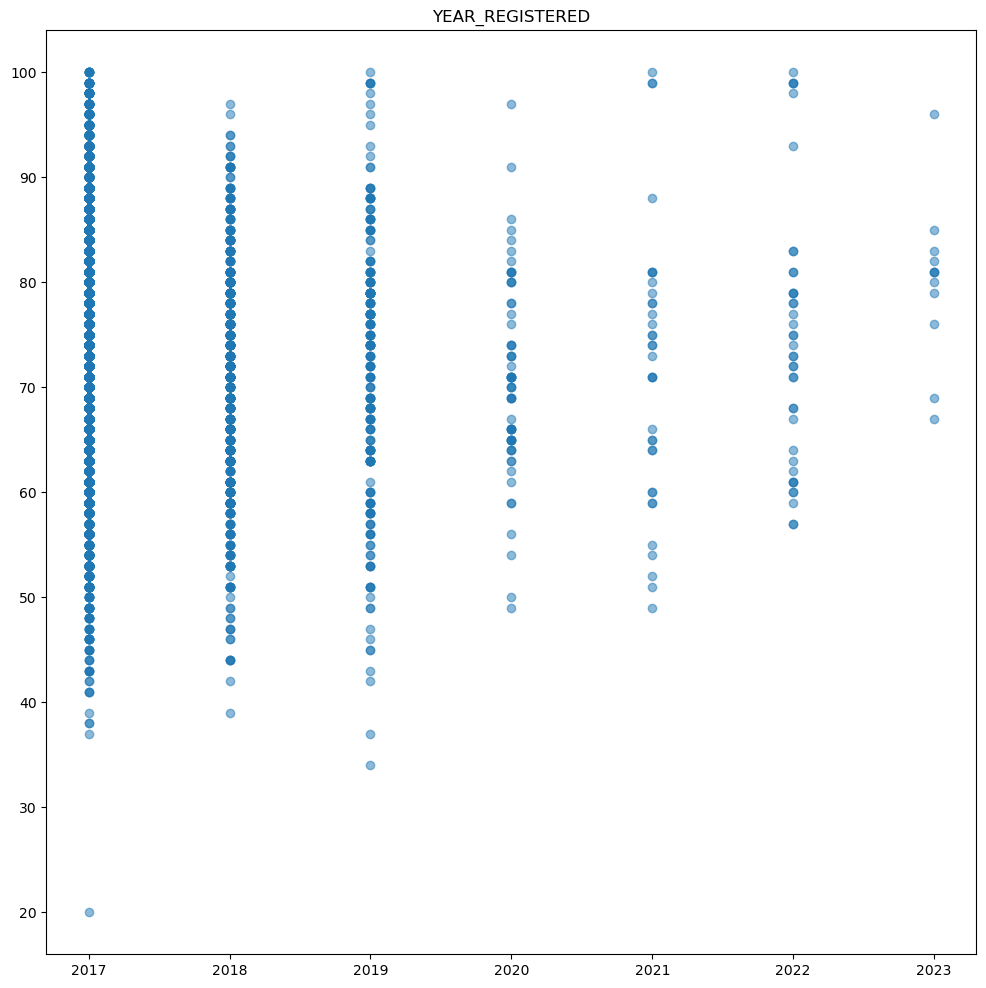

In [42]:
plt.figure()

Y = df_clean['SCORE'].values
X = df_clean['YEAR_REGISTERED'].values
plt.scatter(X, Y, alpha=0.5)
plt.title('YEAR_REGISTERED')
plt.show()

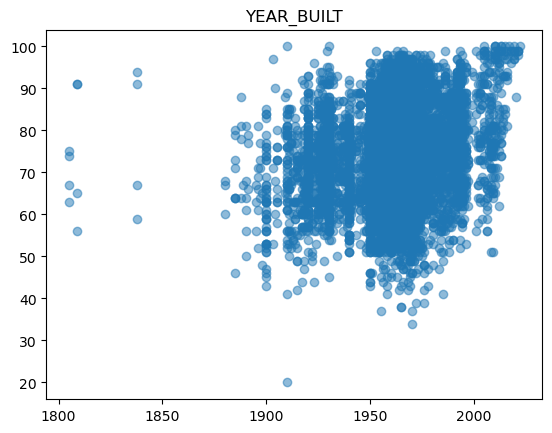

In [22]:

Y = df_clean['SCORE'].values
X = df_clean['YEAR_BUILT'].values
plt.scatter(X, Y, alpha=0.5)
plt.title('YEAR_BUILT')
plt.show()

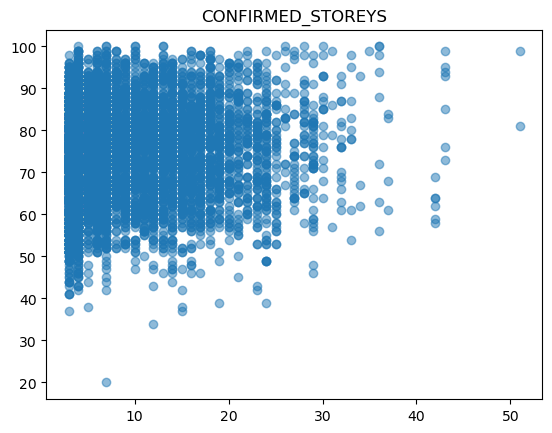

In [23]:
Y = df_clean['SCORE'].values
X = df_clean['CONFIRMED_STOREYS'].values
plt.scatter(X, Y, alpha=0.5)
plt.title('CONFIRMED_STOREYS')
plt.show()

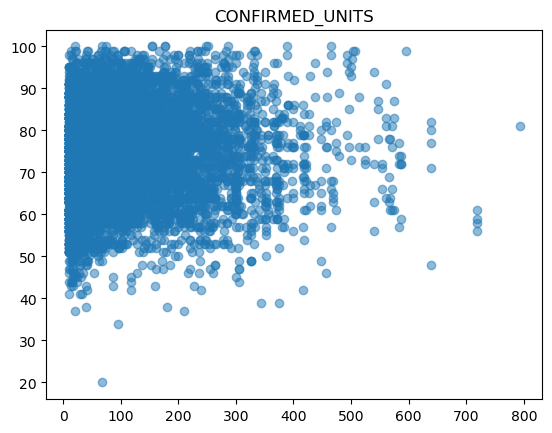

In [24]:
Y = df_clean['SCORE'].values
X = df_clean['CONFIRMED_UNITS'].values
plt.scatter(X, Y, alpha=0.5)
plt.title('CONFIRMED_UNITS')
plt.show()

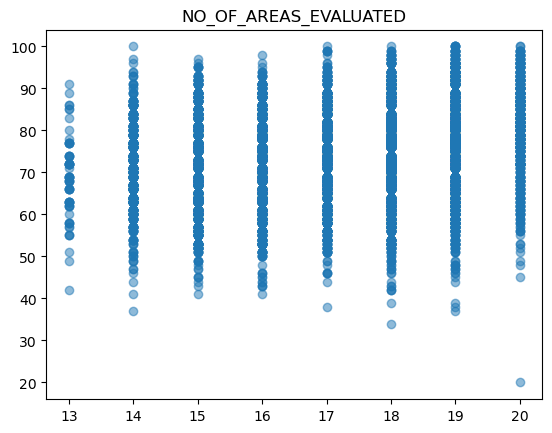

In [25]:
Y = df_clean['SCORE'].values
X = df_clean['NO_OF_AREAS_EVALUATED'].values
plt.scatter(X, Y, alpha=0.5)
plt.title('NO_OF_AREAS_EVALUATED')
plt.show()

**Let's look at the category data.**
- 'PROPERTY_TYPE'
- 'WARDNAME'

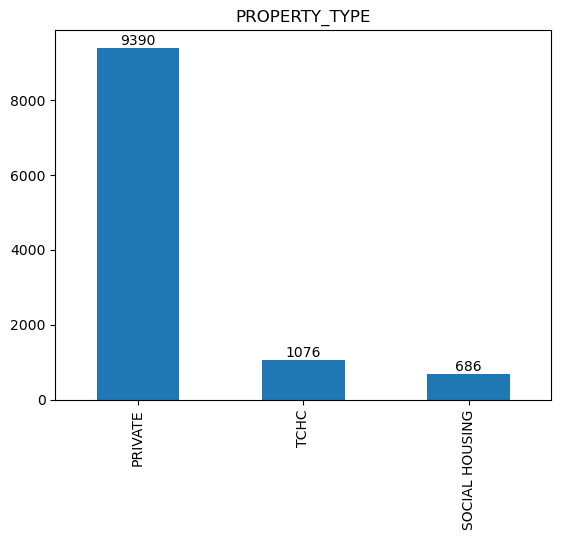

In [40]:
plt.figure()
plt.title('PROPERTY_TYPE')

property_counts = df_clean['PROPERTY_TYPE'].value_counts()

ax = df_clean['PROPERTY_TYPE'].value_counts().plot.bar()

for i, count in enumerate(property_counts):
    ax.annotate(str(count), xy=(i, count), ha='center', va='bottom')
    
plt.show()

**Most buildings are privately owned.**

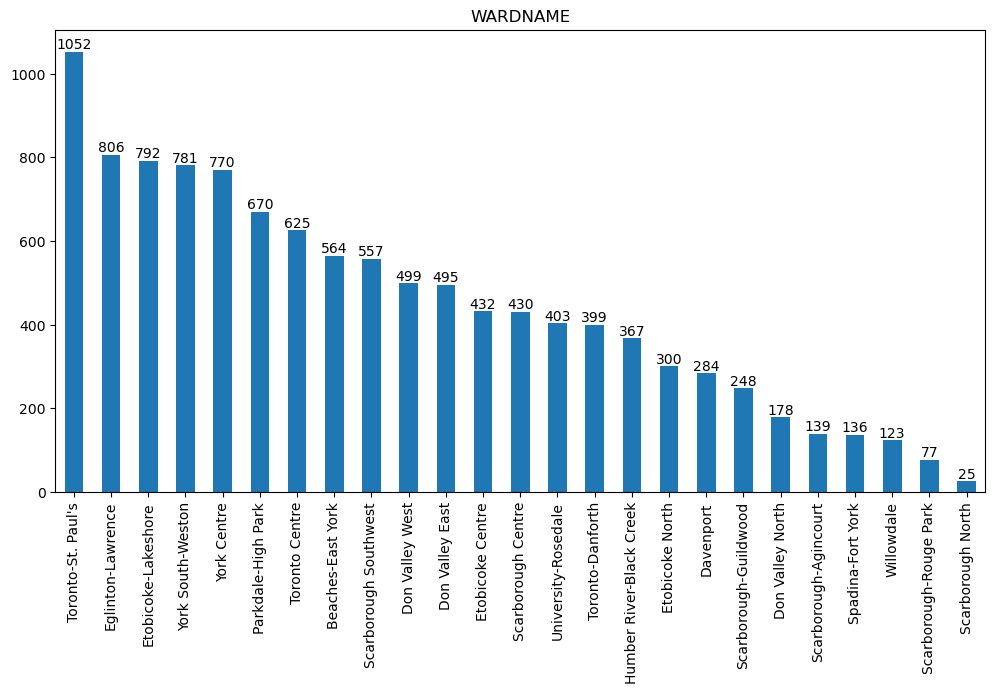

In [43]:
plt.figure(figsize = (12,6))
plt.title('WARDNAME')

wardname_counts = df_clean['WARDNAME'].value_counts()

ax = df_clean['WARDNAME'].value_counts().plot.bar()

for i, count in enumerate(wardname_counts):
    ax.annotate(str(count), xy=(i, count), ha='center', va='bottom')

plt.show()

**"Toronto-St. Paul's" has the most buildings, followed by "Eglinton-Lawrence" and "Etobicoke-Lakeshore".**

In [26]:
import seaborn as sns

/var/folders/36/xfgzdwrx6110n96y2pltdng00000gn/T/ipykernel_70939/318798300.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data = no_target_list.corr(), annot=True,


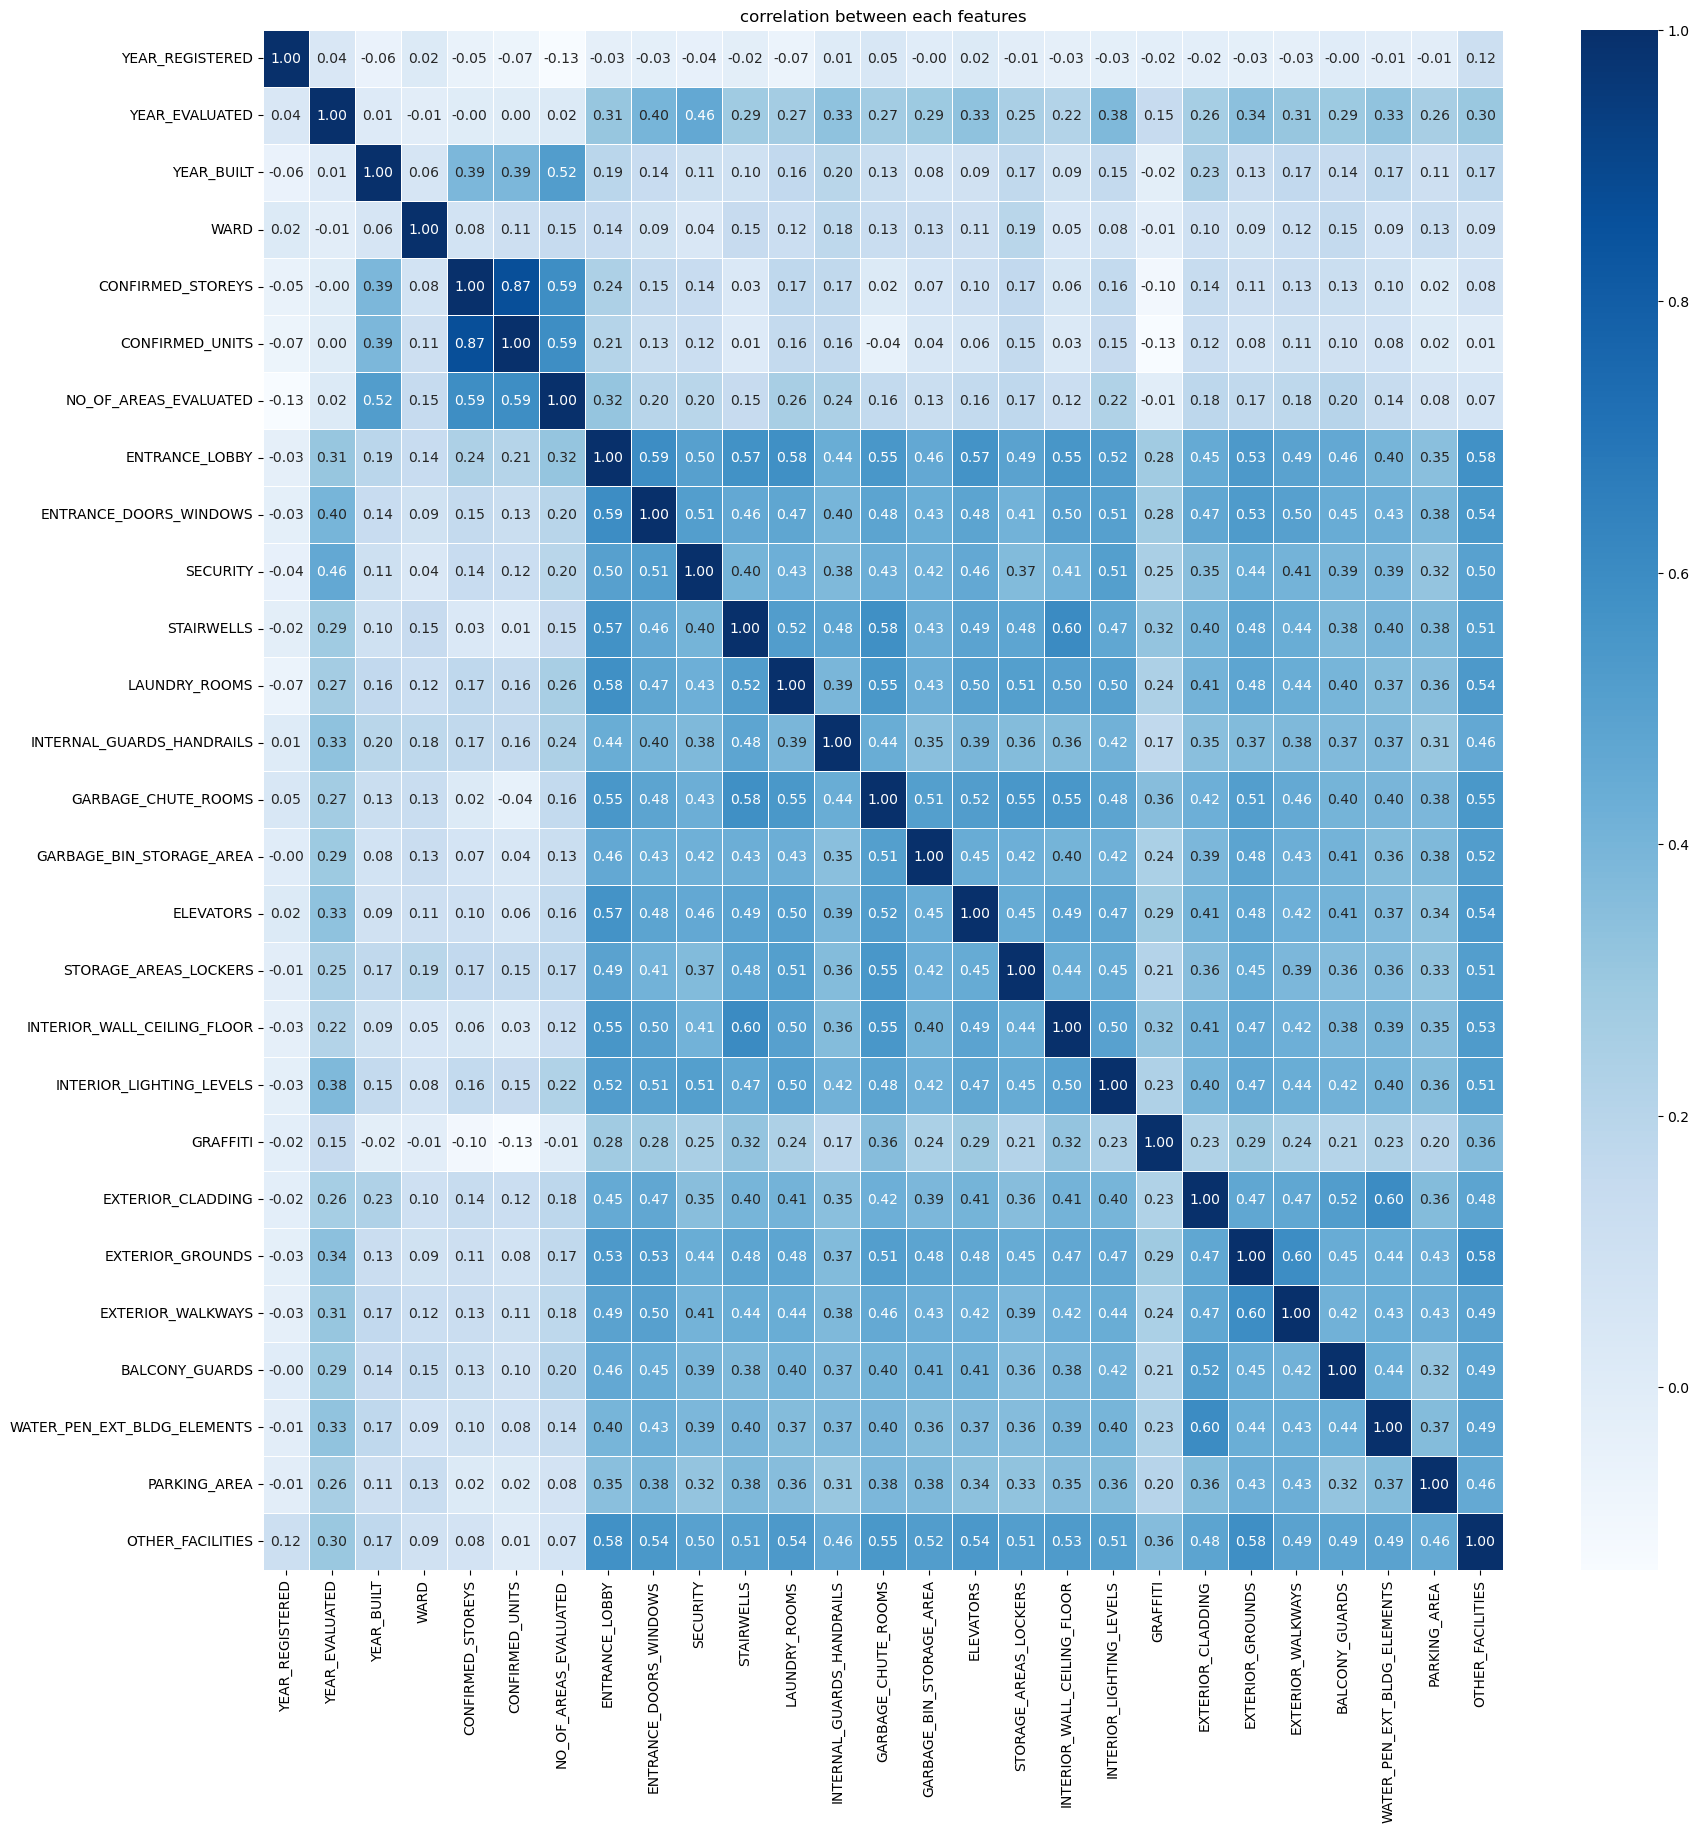

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(data = no_target_list.corr(), annot=True,
           fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title('correlation between each features')
plt.savefig('hyunjung_corr_heatmap.png')

## Modeling

**We will do a linear regression analysis with Numerical columns.**

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [55]:
X = df_clean[['YEAR_REGISTERED', 'YEAR_BUILT', 'CONFIRMED_STOREYS', 'CONFIRMED_UNITS', 'NO_OF_AREAS_EVALUATED']]
y = df_clean['SCORE']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred = model.predict(X_test)

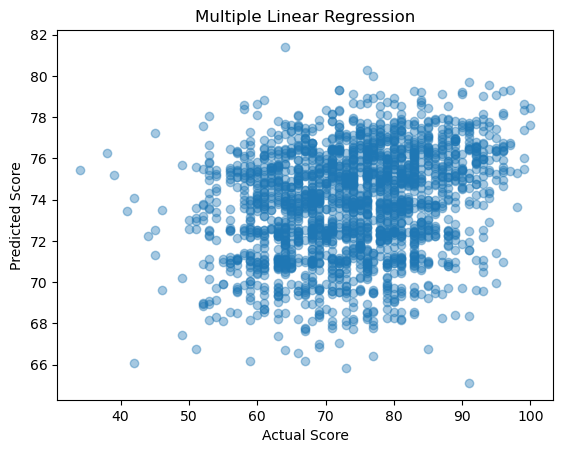

In [72]:
plt.figure()

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Multiple Linear Regression')

plt.show()

In [64]:
model.coef_

array([-0.19581599,  0.04213866,  0.13682133, -0.01331547,  1.33158188])

**The above chart shows the prediction and actual data of linear regression analysis with numerical data. Unfortunately, the prediction is not successful because it does not have a linear shape.**

In [85]:
X = df_clean[['YEAR_BUILT', 'CONFIRMED_STOREYS', 'CONFIRMED_UNITS']]
y = df_clean['SCORE']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [88]:
y_pred = model.predict(X_test)

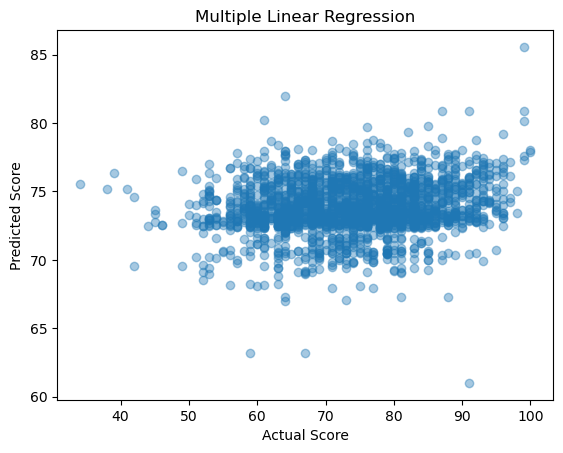

In [89]:
plt.figure()

plt.scatter(y_test, y_pred, alpha=0.4)
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Multiple Linear Regression')

plt.show()

In [90]:
# What is problem.....

**We will use the decision tree with columns evaluated from 1 to 5.**

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [96]:
df_five = ['ENTRANCE_LOBBY',
'ENTRANCE_DOORS_WINDOWS',
'SECURITY',
'STAIRWELLS',
'LAUNDRY_ROOMS',
'INTERNAL_GUARDS_HANDRAILS',
'GARBAGE_BIN_STORAGE_AREA',
'INTERIOR_WALL_CEILING_FLOOR',
'INTERIOR_LIGHTING_LEVELS',
'GRAFFITI',
'EXTERIOR_CLADDING',
'EXTERIOR_GROUNDS',
'EXTERIOR_WALKWAYS',
'BALCONY_GUARDS',
'WATER_PEN_EXT_BLDG_ELEMENTS',
'PARKING_AREA']

In [97]:
X = df_clean[df_five]  # Features
y = df_clean['RESULTS_OF_SCORE']  # Target variable

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=5,)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=42)

In [104]:
y_pred = model.predict(X_test)

In [105]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Report:\n", report)

Accuracy: 0.844016136261766
Report:
                                              precision    recall  f1-score   support

                             Building Audit       0.00      0.00      0.00        17
 Evaluation needs to be conducted in 1 year       0.76      0.83      0.79       489
Evaluation needs to be conducted in 2 years       0.88      0.89      0.89      1435
Evaluation needs to be conducted in 3 years       0.80      0.70      0.75       290

                                   accuracy                           0.84      2231
                                  macro avg       0.61      0.60      0.61      2231
                               weighted avg       0.84      0.84      0.84      2231



/Users/jaysworld/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jaysworld/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jaysworld/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


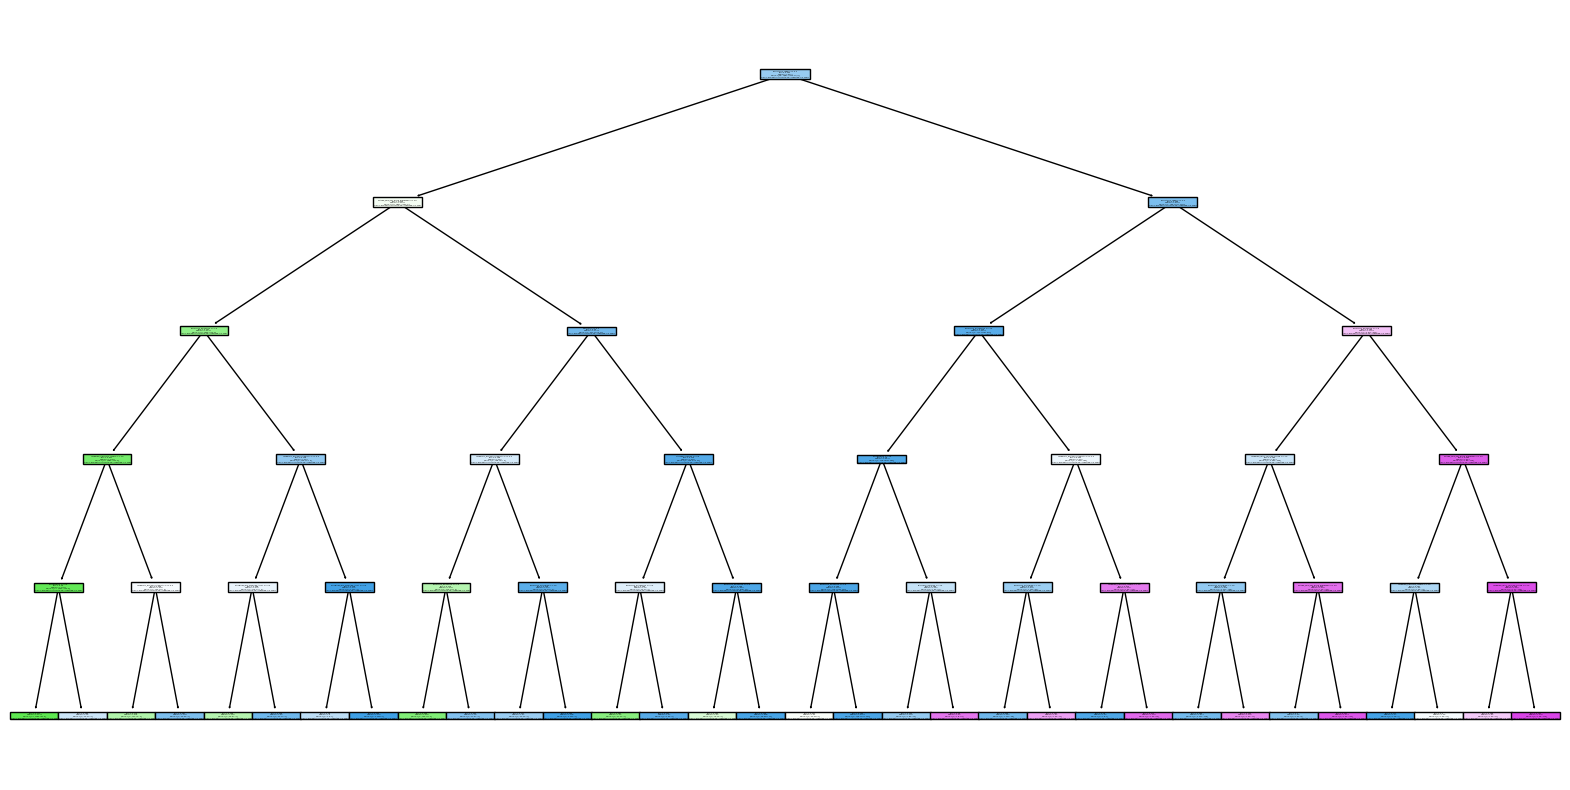

In [106]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True)
plt.show()

1. Cleaning: missing values, duplicated data, data types. If you decide drop any column here because has a lot nulls, then explain why is had to compute the missing data and drop it.
2. EDA: Explore your target, plot your target, exploring numerical and categorical columns, plot the distributions numerical - histograms and categorical bar graphs. 
- Explore possible relations among your columns, you can check relation between your predictor to avoid multicolinearity, also you can check the correlation between your target and your predictors. In this part you can apply some test like pearson or chi2 depending on the case. 
4. Preprocessing: try to convert your categorical columns into numerical columns. At the end of this step you should have one dataframe with all of your predictor in numerical format. Use one hot encoding, labeling, binarize the columns, according each case. Doing this step maybe you can decide drop some columns by your criteria. finishing this step your dataframe is ready for modeling.
3. modeling: start with LINEAR REG MODEL using all of your predictors. subsequently you can try other models, or different sets of data... 